In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 01:36:31 2020

@author: De Dol
"""
# this is a program to build a machine learning module 
#with a linear progression to predict the co2 emmition of
 #   certain verhicles..

# importing the needed libraries

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [13]:
#reading the data
df = pd.read_csv("FuelConsumption.csv",)
 
 #looking at the data
df.head()
plt.show()

In [14]:

# summarize the data and selecting some features
df.describe()
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc733f854e0>,
      dtype=object)

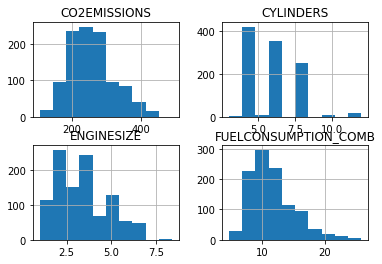

In [15]:
#ploting of the features
vix = cdf[['CYLINDERS','ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
vix.hist()



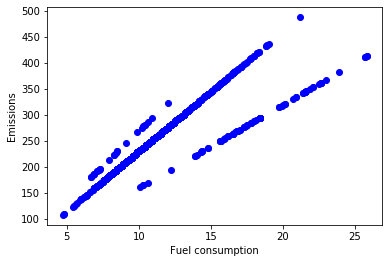

In [16]:
#ploting each feature against emmissions to see their linear relation
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Fuel consumption")

plt.ylabel("Emissions")
plt.show()

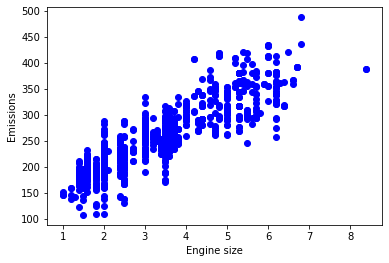

In [17]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show()


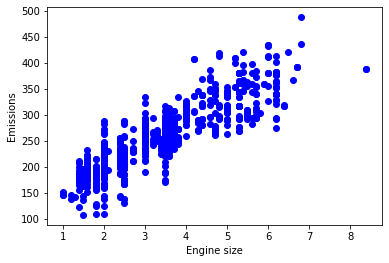

In [18]:
#now we are going to build and train our model
#first we need to split our data set into train and test sets
#note that that rule states that the train set takes 80% of the data

mks = np.random.rand(len(df)) < 0.8
train = cdf[mks]
test = cdf[~mks]

#the train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show()

In [11]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-03-18 22:55:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   184KB/s    in 0.4s    

2020-03-18 22:55:38 (184 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [19]:
# using sklearn to package the model
from sklearn import linear_model
regr =linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# the coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)


Coefficients:  [[39.66550772]]
Intercept:  [123.13910949]


Text(0, 0.5, 'Emissions')

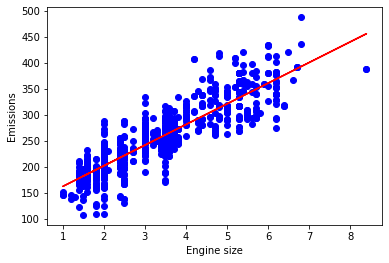

In [20]:
# ploting the fit line over the data (output)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emissions")


In [21]:
# Evaluation
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
ti = np.mean(np.absolute(test_y_ - test_y))
print(f"Mean absolute error: {ti}" )

sa = np.mean(((test_y_ - test_y) ** 2))
print(f"Residual sum of squares (MSE): {sa}"  )

score = r2_score(test_y_, test_y)      
print(f"R2-score: {score}")

Mean absolute error: 22.80476566219219
Residual sum of squares (MSE): 934.7172335612481
R2-score: 0.7199933872745468
